# Welcome to PixieDust

This notebook features an introduction to [PixieDust](https://ibm-watson-data-lab.github.io/pixiedust/index.html), the Python library that makes data visualization easy. 

This notebook runs on Python 2.7 and 3.5, with Spark 2.0.

## <a id="toc"></a>Table of Contents

 * [Get started](#part_one)
 * [Load text data from remote sources](#part_two)
 * [Mix Scala and Python on the same notebook](#part_three)
 * [Add Spark packages and run inside your notebook](#part_four)
 * [Stash your data](#part_five)
 * [Contribute](#contribute)


<hr>

# <a id="part_one"></a>Get started

This introduction is pretty straightforward, but it wouldn't hurt to load up the [PixieDust documentation](https://ibm-watson-data-lab.github.io/pixiedust/) so it's handy. 

New to notebooks? Don't worry. Here's all you need to know to run this introduction:

1. Make sure this notebook is in Edit mode
1. To run code cells, put your cursor in the cell and press **Shift + Enter**.
1. The cell number will change to **[\*]** to indicate that it is currently executing. (When starting with notebooks, it's best to run cells in order, one at a time.)

In [1]:
# To confirm you have the latest version of PixieDust on your system, run this cell
!pip install --user --upgrade pixiedust

Requirement already up-to-date: pixiedust in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s554-b7b9a98bdeab1f-837a40d9c621/.local/lib/python2.7/site-packages
Requirement already up-to-date: mpld3 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s554-b7b9a98bdeab1f-837a40d9c621/.local/lib/python2.7/site-packages (from pixiedust)
Requirement already up-to-date: markdown in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s554-b7b9a98bdeab1f-837a40d9c621/.local/lib/python2.7/site-packages (from pixiedust)
Requirement already up-to-date: lxml in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s554-b7b9a98bdeab1f-837a40d9c621/.local/lib/python2.7/site-packages (from pixiedust)
Requirement already up-to-date: astunparse in /usr/local/src/bluemix_jupyter_bundle.v79/notebook/lib/python2.7/site-packages (from pixiedust)
Requirement already up-to-date: geojson in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s554-b7b9a98bdeab1f-837a40d9c621/.local/lib/python2.7/site-packages (from pixiedust)
Require

Now that you have PixieDust installed and up-to-date on your system, you need to import it into this notebook. This is the last dependency before you can play with PixieDust.

In [2]:
import pixiedust

Pixiedust database opened successfully


If you get a message telling you that you're not running the latest version of PixieDust, restart the kernel from the **Kernel** menu and rerun the `import pixiedust` command. (Any time you restart the kernel, rerun the `import pixiedust` command.)

## Behold, display()

In the next cell, build a simple dataset and store it in a variable. 

In [3]:
# Build the SQL context required to create a Spark dataframe 
sqlContext=SQLContext(sc) 
# Create the Spark dataframe, passing in some data, and assign it to a variable
df = spark.createDataFrame(
[("Green", 75),
 ("Blue", 25)],
["Colors","%"])

The data in the variable `df` is ready to be visualized, without any further code other than the call to `display()`.


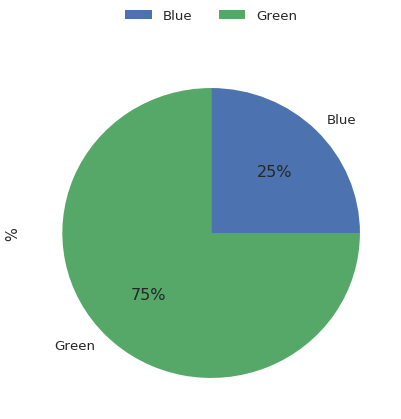

In [4]:
# display the dataframe above as a pie chart
display(df)

After running the cell above, you should see a Spark DataFrame displayed as a **pie chart**, along with some controls to tweak the display. All that came from passing the DataFrame variable to `display()`.

In the next cell, you'll pass more interesting data to `display()`, which will also offer more advanced controls.


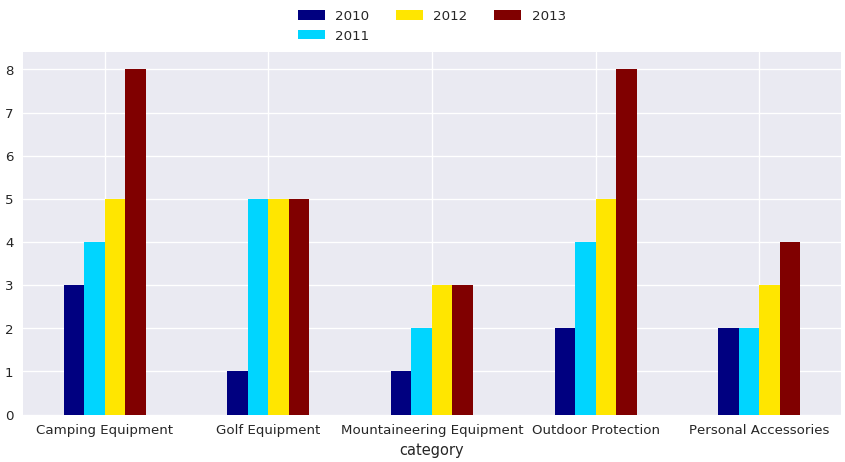

In [5]:
# create another DataFrame, in a new variable
df2 = spark.createDataFrame(
[(2010, 'Camping Equipment', 3),
 (2010, 'Golf Equipment', 1),
 (2010, 'Mountaineering Equipment', 1),
 (2010, 'Outdoor Protection', 2),
 (2010, 'Personal Accessories', 2),
 (2011, 'Camping Equipment', 4),
 (2011, 'Golf Equipment', 5),
 (2011, 'Mountaineering Equipment',2),
 (2011, 'Outdoor Protection', 4),
 (2011, 'Personal Accessories', 2),
 (2012, 'Camping Equipment', 5),
 (2012, 'Golf Equipment', 5),
 (2012, 'Mountaineering Equipment', 3),
 (2012, 'Outdoor Protection', 5),
 (2012, 'Personal Accessories', 3),
 (2013, 'Camping Equipment', 8),
 (2013, 'Golf Equipment', 5),
 (2013, 'Mountaineering Equipment', 3),
 (2013, 'Outdoor Protection', 8),
 (2013, 'Personal Accessories', 4)],
["year","category","unique_customers"])

# This time, we've combined the dataframe and display() call in the same cell
# Run this cell 
display(df2)

## display() controls

### Renderers
The chart above, like the first one, is rendered by matplotlib. With PixieDust, you have other options. To toggle between renderers, use the `Renderers` control at top right of the display output:
1. [Bokeh](http://bokeh.pydata.org/en/0.10.0/index.html) is interactive; play with the controls along the top of the chart, for example, zoom and save.
1. [Matplotlib](http://matplotlib.org/) is static; you can save the image as a PNG

### Chart options

1. **Chart types**: At top left, you should see an option to display the dataframe as a table. You should also see a dropdown menu with other chart options, including bar charts, pie charts, scatter plots, and so on.
1. **Options**: Click the `Options` button to explore other display configurations; for example, clustering and aggregation.

Here's more on [customizing `display()` output](https://ibm-watson-data-lab.github.io/pixiedust/displayapi.html).

## Load External Data
So far, you've worked with data hard-coded into our notebook. Now, load external data (CSV) from a URL.


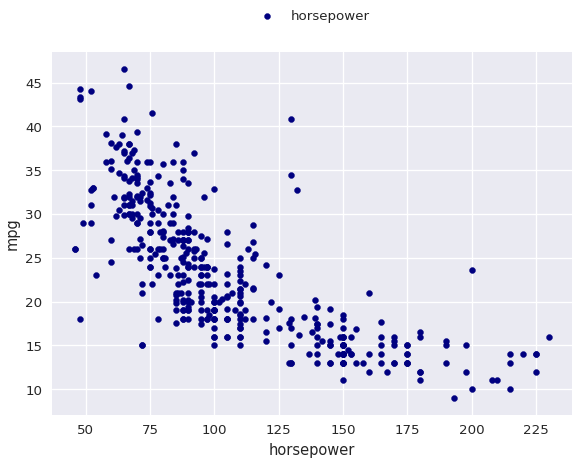

In [6]:
# load a CSV with pixiedust.sampleData()
df3 = pixiedust.sampleData("https://github.com/ibm-watson-data-lab/open-data/raw/master/cars/cars.csv")
display(df3)

You should see a scatterplot above, rendered again by matplotlib. Find the `Renderer` menu at top-right. You should see options for **Bokeh** and **Seaborn**. If you don't see Seaborn, it's not installed on your system. No problem, just install it by running the next cell.

In [7]:
# To install Seaborn, uncomment the next line, and then run this cell
#!pip install --user seaborn

*If you installed Seaborn, you'll need to also restart your notebook kernel, and run the cell to `import pixiedust` again. Find **Restart** in the **Kernel** menu above.*

End of chapter. [Return to table of contents](#toc)
<hr>


# <a id="part_two"></a>Load text data from remote sources


Data files commonly reside in remote sources, such as such as public or private market places or GitHub repositories. You can load comma separated value (csv) data files using Pixiedust's `sampleData` method. 

## Prerequisites

If you haven't already, import PixieDust. Follow the instructions in [Get started](#part_one).

## Load  data

To load a data set, run `pixiedust.sampleData` and specify the data set URL:

In [8]:
homes = pixiedust.sampleData("https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv")

Downloaded 102051 bytes
Creating pySpark DataFrame for 'https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv'. Please wait...
Loading file using 'SparkSession'
Successfully created pySpark DataFrame for 'https://openobjectstore.mybluemix.net/misc/milliondollarhomes.csv'


The `pixiedust.sampleData` method loads the data into an [Apache Spark DataFrame](https://spark.apache.org/docs/latest/sql-programming-guide.html#datasets-and-dataframes), which you can inspect and visualize using `display()`.

## Inspect and preview the loaded data

To inspect the automatically inferred schema and preview a small subset of the data, you can use the _DataFrame Table_ view, as shown in this preconfigured example: 

In [9]:
display(homes)

PROPERTY TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQFT,LOT SIZE,YEAR BUILT,DAYS ON MARKET,URL,SOURCE,LISTING ID,LATITUDE,LONGITUDE
Single Family Residential,4 Newbury Road Rd,Windham,NH,3087,2450000,5.0,7.5,Windham,13461.0,139392.0,2008.0,84.0,http://www.redfin.com/NH/Windham/4-Newbury-Rd-03087/home/96548208,NEREN,58467283.0,42.83153747,-71.27639808
Condo/Co-op,18 Yarmouth St #1,Boston,MA,2116,2600000,3.0,3.5,South End,2522.0,nan,1880.0,88.0,http://www.redfin.com/MA/Boston/18-Yarmouth-St-02116/unit-1/home/9313347,MLS PIN,59168291.0,42.3458731,-71.0767967
Condo/Co-op,576 Washington St #206,Wellesley,MA,2482,2500000,2.0,2.5,Wellesley,2221.0,nan,2015.0,59.0,http://www.redfin.com/MA/Wellesley/576-Washington-St-02482/unit-206/home/109083144,MLS PIN,62060226.0,42.295421,-71.292739
Single Family Residential,2 Wellington Way,Bedford,MA,1730,1150000,4.0,3.5,Wellington Way,3531.0,43560.0,2012.0,58.0,http://www.redfin.com/MA/Bedford/2-Wellington-Way-01730/home/41363649,MLS PIN,59806880.0,42.5029123,-71.2849657
Townhouse,170 Harvard St Unit 1,Newton,MA,2460,1100000,4.0,3.5,Newtonville,2388.0,10089.0,1910.0,66.0,http://www.redfin.com/MA/Newton/170-Harvard-St-02460/unit-1/home/109313528,MLS PIN,62550577.0,42.3468986,-71.2005455
Single Family Residential,78 Bonad Rd,Brookline,MA,2467,1070000,3.0,2.5,South Brookline,1806.0,4982.0,2016.0,71.0,http://www.redfin.com/MA/Brookline/78-Bonad-Rd-02467/home/109052310,MLS PIN,61948749.0,42.3178198,-71.1626756
Single Family Residential,217 Forest St,Winchester,MA,1890,1155000,4.0,3.5,Muraco School District,3779.0,9234.0,2013.0,72.0,http://www.redfin.com/MA/Winchester/217-Forest-St-01890/home/110057079,MLS PIN,56198065.0,42.4714541,-71.1156268
Single Family Residential,14 Hillside Ave,Cambridge,MA,2140,5350000,3.0,2.5,None,4557.0,15526.0,1905.0,nan,http://www.redfin.com/MA/Cambridge/14-Hillside-Ave-02140/home/110093849,None,nan,42.3853181,-71.1238296
Single Family Residential,129 I St,Boston,MA,2127,1290000,4.0,2.5,South Boston,2385.0,nan,1890.0,77.0,http://www.redfin.com/MA/Boston/129-I-St-02127/home/9187855,MLS PIN,59630321.0,42.3337549,-71.040101
Single Family Residential,297 Heaths Bridge Rd,Concord,MA,1742,1400000,3.0,3.0,Conantum,5135.0,61344.0,1995.0,78.0,http://www.redfin.com/MA/Concord/297-Heaths-Bridge-Rd-01742/home/11600408,MLS PIN,61928887.0,42.434909,-71.362825


## Simple visualization using bar charts

With PixieDust `display()`, you can visually explore the loaded data using built-in charts, such as, bar charts, line charts, scatter plots, or maps.

To explore a data set:
* choose the desired chart type from the drop down
* configure chart options
* configure display options

You can analyze the average home price for each city by choosing: 
* chart type: bar chart
* chart options
 * _Options > Keys_: `CITY`
 * _Options > Values_: `PRICE` 
 * _Options > Aggregation_: `AVG`
 
Run the next cell to review the results. 


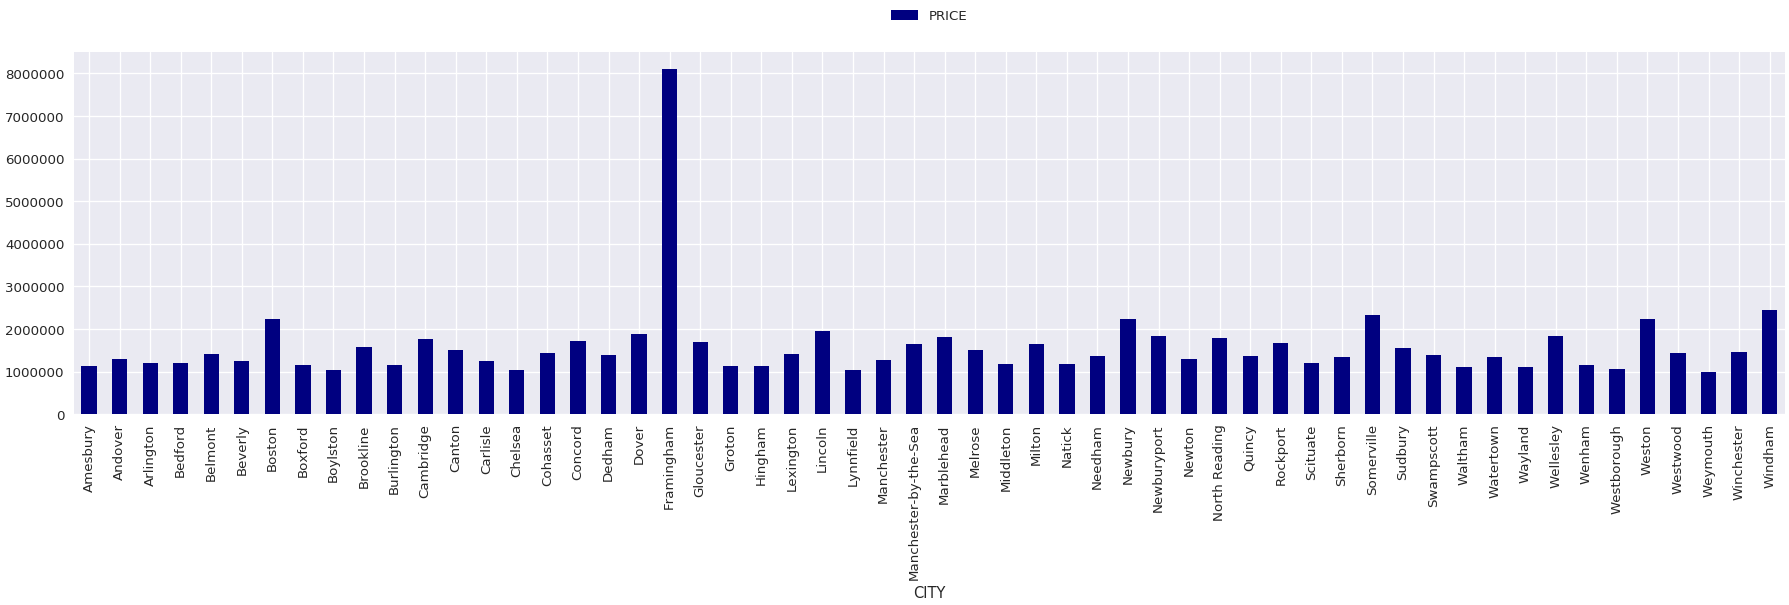

In [ ]:
display(homes)

## Explore the data

You can change the display **Options** so you can continue to explore the loaded data set without having to pre-process the data. 

For example, change: 
* _Options > Key_ to `YEAR_BUILT` and 
* _Options > aggregation_ to `COUNT` 

Now you can find out how old the listed properties are:

In [11]:
display(homes)

## Use sample data sets

PixieDust comes with a set of curated data sets that you can use get familiar with the different chart types and options. 

Type `pixiedust.sampleData()` to display those data sets.

In [12]:
pixiedust.sampleData()

Id,Name,Topic,Publisher
1,Car performance data,Transportation,IBM
2,"Sample retail sales transactions, January 2009",Economy & Business,IBM Cloud Data Services
3,Total population by country,Society,IBM Cloud Data Services
4,GoSales Transactions for Naive Bayes Model,Leisure,IBM
5,Election results by County,Society,IBM
6,Million dollar home sales in NE Mass late 2016,Economy & Business,Redfin.com
7,"Boston Crime data, 2-week sample",Society,City of Boston


The homes sales data set you loaded earlier is one of the samples. Therefore, you could have loaded it by specifying the displayed data set id as parameter: `home = pixiedust.sampleData(6)`

If your data isn't stored in csv files, you can load it into a DataFrame from any supported Spark [data source](https://spark.apache.org/docs/latest/sql-programming-guide.html#data-sources). See [these Python code snippets](https://apsportal.ibm.com/docs/content/analyze-data/python_load.html) for more information.

End of chapter. [Return to table of contents](#toc)
<hr>

## Enter an issue

Found a bug? Thought of great enhancement? [Enter an issue](https://github.com/ibm-watson-data-lab/pixiedust/issues) to let us know. Tell us what you think.

## Share PixieDust

If you think someone you know would be interested in PixieDust, spread the word:

 - <a href="https://twitter.com/home?status=Happy%20to%20find%20PixieDust.%20Data%20notebook%20visualizations%20for%20everyone%3A%20https%3A//github.com/ibm-watson-data-lab/pixiedust%0A">Tweet</a>
 - <a href="https://www.linkedin.com/shareArticle?mini=true&url=https%3A//github.com/ibm-watson-data-lab/pixiedust&title=PixieDust%3A%20Data%20notebook%20visualizations%20for%20everyone&summary=Happy%20to%20find%20PixieDust,%20a%20new%20helper%20library%20for%20python%20and%20scala%3A%20https%3A//github.com/ibm-watson-data-lab/pixiedust%0A&source=">Share on LinkedIn</a>
 - <a href="mailto:?&subject=PixieDust: Data notebook visualizations for everyone&body=I%20found%20a%20new%20helper%20library%20for%20notebooks%3A%20https%3A//github.com/ibm-watson-data-lab/pixiedust">Send email</a>

## Learn more

Ready to pitch in? We can't wait to see what you share. [More on how to contribute](https://ibm-watson-data-lab.github.io/pixiedust/contribute.html). 

End of chapter. [Return to table of contents](#toc)

## Authors
* Jose Barbosa
* Mike Broberg
* Inge Halilovic
* Jess Mantaro
* Brad Noble
* David Taieb
* Patrick Titzler

<hr>
Copyright &copy; IBM Corp. 2017. This notebook and its source code are released under the terms of the MIT License.